In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_excel('data.xlsx')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [5]:
import seaborn as sns


C:\Users\vedant kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='N'>

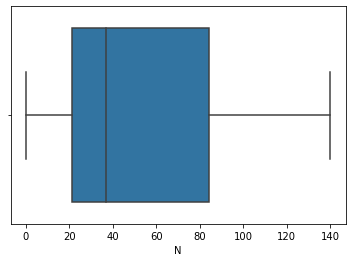

In [6]:
sns.boxplot(df['N'])

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

<AxesSubplot:>

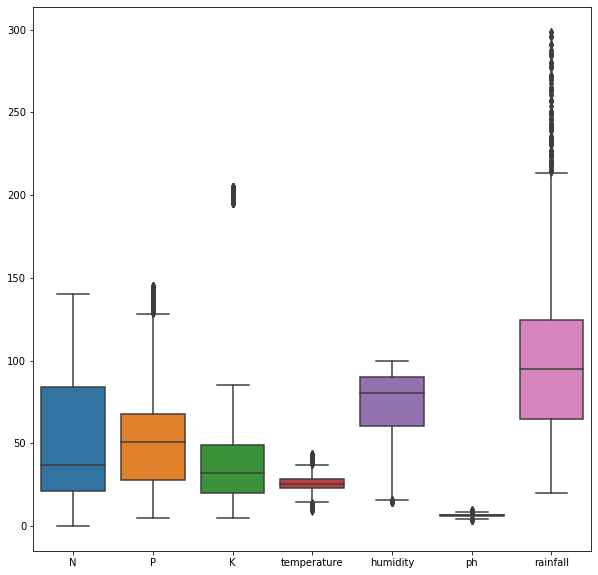

In [8]:
figs=plt.figure(figsize=(10,10))
sns.boxplot(data=df)

C:\Users\vedant kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vedant kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vedant kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

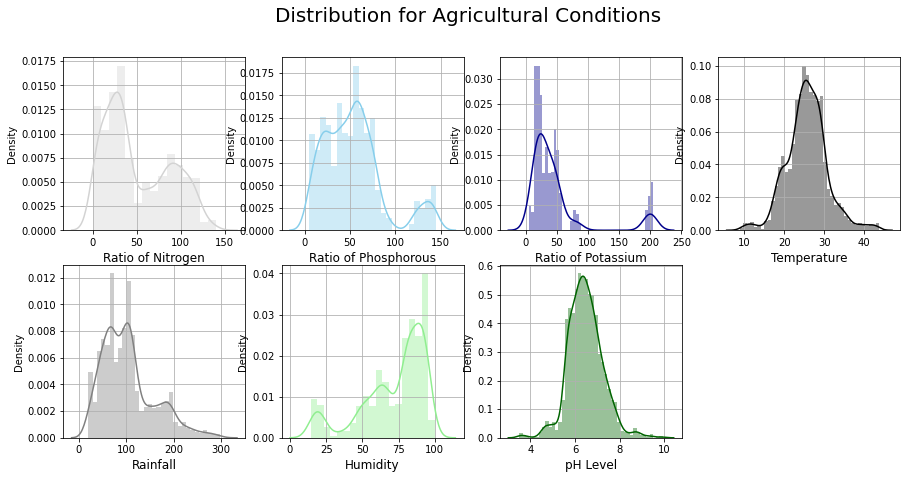

In [9]:
plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(2, 4, 1)
sns.distplot(df['N'], color = 'lightgrey')
plt.xlabel('Ratio of Nitrogen', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 2)
sns.distplot(df['P'], color = 'skyblue')
plt.xlabel('Ratio of Phosphorous', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 3)
sns.distplot(df['K'], color ='darkblue')
plt.xlabel('Ratio of Potassium', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 4)
sns.distplot(df['temperature'], color = 'black')
plt.xlabel('Temperature', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 5)
sns.distplot(df['rainfall'], color = 'grey')
plt.xlabel('Rainfall', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 6)
sns.distplot(df['humidity'], color = 'lightgreen')
plt.xlabel('Humidity', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 7)
sns.distplot(df['ph'], color = 'darkgreen')
plt.xlabel('pH Level', fontsize = 12)
plt.grid()

plt.suptitle('Distribution for Agricultural Conditions', fontsize = 20)
plt.show()


In [10]:
X=df.drop(['label'],axis=1)
y=df['label']

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [13]:
X=pd.DataFrame(X)

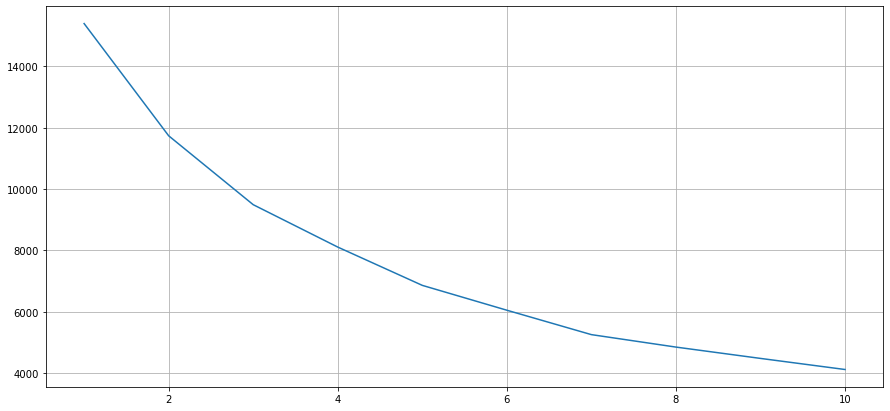

In [14]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(init='k-means++',n_clusters=i,max_iter=300,n_init=10)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.grid()

In [15]:
kmeans=KMeans(n_clusters=4,max_iter=300,n_init=10,init='k-means++')
y_means=kmeans.fit_predict(X)
labeller=pd.DataFrame()
labeller['y_means']=y_means
labeller['label']=y

In [16]:
labeller['y_means'].value_counts()

0    797
1    618
3    585
2    200
Name: y_means, dtype: int64

In [17]:
print(labeller[labeller['y_means']==0]['label'].unique())
print('-------------------------------------------------------')
print(labeller[labeller['y_means']==1]['label'].unique())
print('-------------------------------------------------------')
print(labeller[labeller['y_means']==2]['label'].unique())
print('-------------------------------------------------------')
print(labeller[labeller['y_means']==3]['label'].unique())
print('-------------------------------------------------------')

['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'mango']
-------------------------------------------------------
['rice' 'pigeonpeas' 'pomegranate' 'orange' 'papaya' 'coconut' 'jute'
 'coffee']
-------------------------------------------------------
['grapes' 'apple']
-------------------------------------------------------
['maize' 'mungbean' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton'
 'jute' 'coffee']
-------------------------------------------------------


In [18]:
for i in range(4):
    items_dic=labeller[labeller['y_means']==i]['label'].value_counts()
    items_dic=dict(items_dic)
    new_dic={}
    for item in items_dic.items():
        if item[1]>50:
            new_dic.update({item})
    print(new_dic)
    print('--------------------------------------------------------')
    

{'chickpea': 100, 'kidneybeans': 100, 'mothbeans': 100, 'blackgram': 100, 'lentil': 100, 'mango': 100, 'mungbean': 91, 'pigeonpeas': 88}
--------------------------------------------------------
{'rice': 100, 'pomegranate': 100, 'orange': 100, 'coconut': 100, 'jute': 99, 'papaya': 60}
--------------------------------------------------------
{'grapes': 100, 'apple': 100}
--------------------------------------------------------
{'banana': 100, 'watermelon': 100, 'muskmelon': 100, 'cotton': 100, 'maize': 82, 'coffee': 53}
--------------------------------------------------------


C:\Users\vedant kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vedant kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vedant kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C

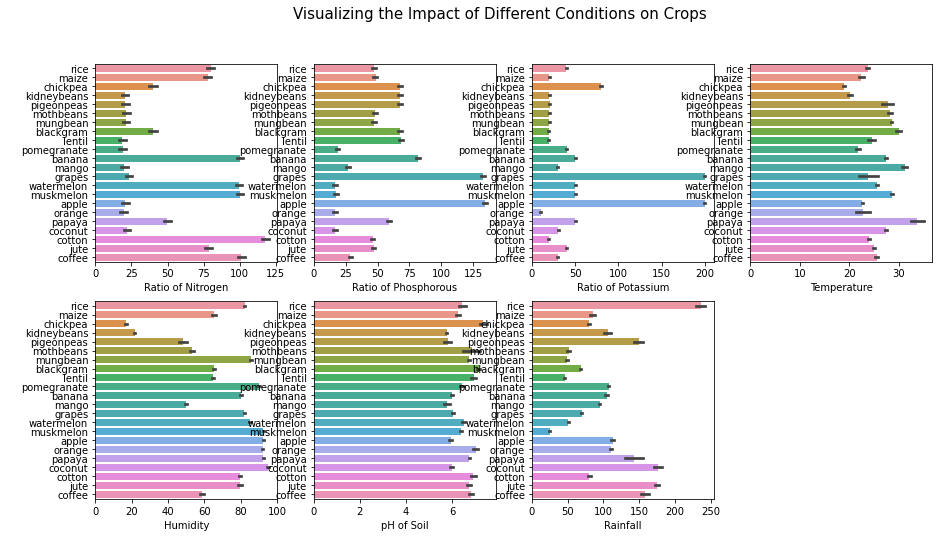

In [19]:
plt.rcParams['figure.figsize'] = (15, 8)

plt.subplot(2, 4, 1)
sns.barplot(df['N'], df['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Nitrogen', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 2)
sns.barplot(df['P'], df['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Phosphorous', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 3)
sns.barplot(df['K'], df['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Potassium', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 4)
sns.barplot(df['temperature'], df['label'])
plt.ylabel(' ')
plt.xlabel('Temperature', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 5)
sns.barplot(df['humidity'], df['label'])
plt.ylabel(' ')
plt.xlabel('Humidity', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 6)
sns.barplot(df['ph'], df['label'])
plt.ylabel(' ')
plt.xlabel('pH of Soil', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 7)
sns.barplot(df['rainfall'], df['label'])
plt.ylabel(' ')
plt.xlabel('Rainfall', fontsize = 10)
plt.yticks(fontsize = 10)

plt.suptitle('Visualizing the Impact of Different Conditions on Crops', fontsize = 15)
plt.show()

In [20]:
for i in range(4):
    print(labeller[labeller['y_means']==i]['label'].value_counts())

chickpea       100
kidneybeans    100
mothbeans      100
blackgram      100
lentil         100
mango          100
mungbean        91
pigeonpeas      88
maize           18
Name: label, dtype: int64
rice           100
pomegranate    100
orange         100
coconut        100
jute            99
papaya          60
coffee          47
pigeonpeas      12
Name: label, dtype: int64
grapes    100
apple     100
Name: label, dtype: int64
banana        100
watermelon    100
muskmelon     100
cotton        100
maize          82
coffee         53
papaya         40
mungbean        9
jute            1
Name: label, dtype: int64


In [ ]:
croplist=['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']
